Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/4/'

N = 50_000
R = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 17:51:26 2025 +0200) (511.11ms ela...,0.2250,0.0000,0.335,0.52,0.07,4.59,63.86 C,Nominal
1,(Fri Apr 18 17:51:27 2025 +0200) (508.04ms ela...,1.3000,0.0365,0.353,1.53,0.28,22.50,63.86 C,Nominal
2,(Fri Apr 18 17:51:27 2025 +0200) (508.46ms ela...,0.0714,0.0000,0.269,0.15,0.05,3.50,63.51 C,Nominal
3,(Fri Apr 18 17:51:28 2025 +0200) (508.09ms ela...,0.0891,0.0000,0.266,0.16,0.05,3.41,63.51 C,Nominal
4,(Fri Apr 18 17:51:28 2025 +0200) (508.67ms ela...,0.1030,0.0000,0.271,0.19,0.06,4.15,63.11 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(468, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 17:51:38 2025 +0200) (1007.81ms el...,40.0,0.0,1.840,41.22,3.94,98.92,61.28 C,Nominal
1,(Fri Apr 18 17:51:39 2025 +0200) (1006.04ms el...,35.9,0.0,0.719,36.68,3.87,98.42,65.50 C,Nominal
2,(Fri Apr 18 17:51:40 2025 +0200) (1004.99ms el...,35.5,0.0,0.721,36.32,3.85,97.71,68.66 C,Nominal
3,(Fri Apr 18 17:51:41 2025 +0200) (1005.84ms el...,35.7,0.0,0.790,36.51,3.86,98.41,71.04 C,Nominal
4,(Fri Apr 18 17:51:42 2025 +0200) (1005.99ms el...,36.7,0.0,0.876,37.58,3.96,99.34,73.23 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 17:39:05 2025 +0200) (510.84ms ela...,0.21,0.0000,0.260,0.28,0.05,3.77,50.28 C,Nominal
1,(Fri Apr 18 17:39:06 2025 +0200) (507.87ms ela...,0.10,0.0328,0.384,0.21,0.05,3.55,50.35 C,Nominal
2,(Fri Apr 18 17:39:06 2025 +0200) (508.24ms ela...,1.16,0.0000,0.293,1.28,0.21,16.23,50.35 C,Nominal
3,(Fri Apr 18 17:39:07 2025 +0200) (510.00ms ela...,1.92,0.0251,0.432,2.16,0.33,21.89,50.36 C,Nominal
4,(Fri Apr 18 17:39:07 2025 +0200) (508.36ms ela...,5.26,0.0000,0.406,5.77,1.02,92.16,50.36 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(599, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 17:39:17 2025 +0200) (1008.16ms el...,11.00,0.0135,0.943,12.98,1.28,98.98,50.21 C,Nominal
1,(Fri Apr 18 17:39:18 2025 +0200) (1006.09ms el...,14.80,0.0000,0.969,17.72,1.69,98.63,51.27 C,Nominal
2,(Fri Apr 18 17:39:19 2025 +0200) (1007.02ms el...,9.14,0.0000,0.806,11.94,1.04,99.48,53.99 C,Nominal
3,(Fri Apr 18 17:39:20 2025 +0200) (1005.74ms el...,8.85,0.0000,0.745,11.61,1.02,99.79,55.09 C,Nominal
4,(Fri Apr 18 17:39:21 2025 +0200) (1007.36ms el...,8.93,0.0000,0.751,11.70,1.01,99.71,55.82 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 17:51:26,0.2250,0.0000,0.335,0.52,0.07,4.59,63.86,Nominal,511.11
1,2025-04-18 17:51:27,1.3000,0.0365,0.353,1.53,0.28,22.50,63.86,Nominal,508.04
2,2025-04-18 17:51:27,0.0714,0.0000,0.269,0.15,0.05,3.50,63.51,Nominal,508.46
3,2025-04-18 17:51:28,0.0891,0.0000,0.266,0.16,0.05,3.41,63.51,Nominal,508.09
4,2025-04-18 17:51:28,0.1030,0.0000,0.271,0.19,0.06,4.15,63.11,Nominal,508.67


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(468, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 17:51:38,40.0,0.0,1.840,41.22,3.94,98.92,61.28,Nominal,1007.81
1,2025-04-18 17:51:39,35.9,0.0,0.719,36.68,3.87,98.42,65.50,Nominal,1006.04
2,2025-04-18 17:51:40,35.5,0.0,0.721,36.32,3.85,97.71,68.66,Nominal,1004.99
3,2025-04-18 17:51:41,35.7,0.0,0.790,36.51,3.86,98.41,71.04,Nominal,1005.84
4,2025-04-18 17:51:42,36.7,0.0,0.876,37.58,3.96,99.34,73.23,Nominal,1005.99


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 17:39:05,0.21,0.0000,0.260,0.28,0.05,3.77,50.28,Nominal,510.84
1,2025-04-18 17:39:06,0.10,0.0328,0.384,0.21,0.05,3.55,50.35,Nominal,507.87
2,2025-04-18 17:39:06,1.16,0.0000,0.293,1.28,0.21,16.23,50.35,Nominal,508.24
3,2025-04-18 17:39:07,1.92,0.0251,0.432,2.16,0.33,21.89,50.36,Nominal,510.00
4,2025-04-18 17:39:07,5.26,0.0000,0.406,5.77,1.02,92.16,50.36,Nominal,508.36


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(599, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 17:39:17,11.00,0.0135,0.943,12.98,1.28,98.98,50.21,Nominal,1008.16
1,2025-04-18 17:39:18,14.80,0.0000,0.969,17.72,1.69,98.63,51.27,Nominal,1006.09
2,2025-04-18 17:39:19,9.14,0.0000,0.806,11.94,1.04,99.48,53.99,Nominal,1007.02
3,2025-04-18 17:39:20,8.85,0.0000,0.745,11.61,1.02,99.79,55.09,Nominal,1005.74
4,2025-04-18 17:39:21,8.93,0.0000,0.751,11.70,1.01,99.71,55.82,Nominal,1007.36


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


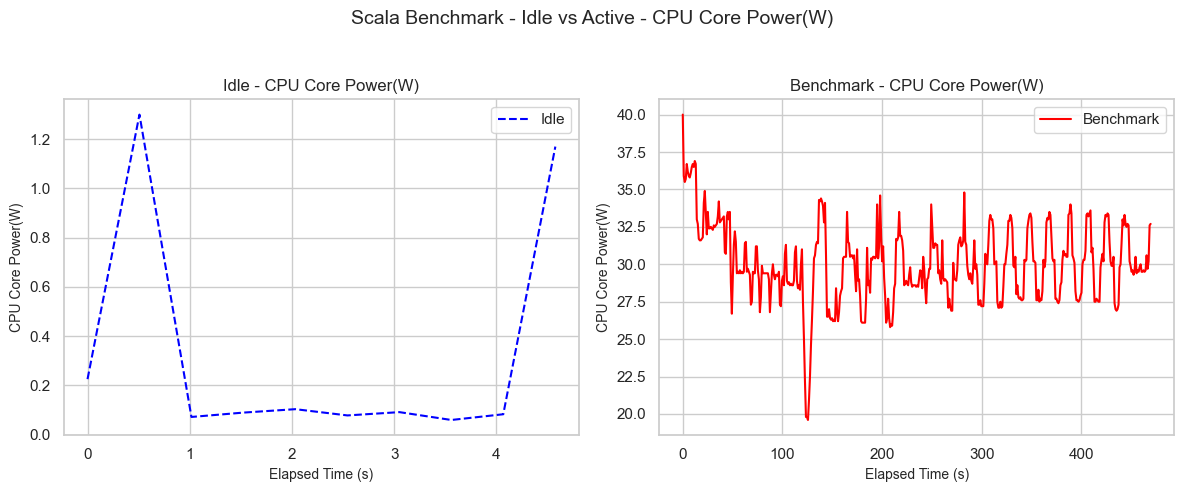

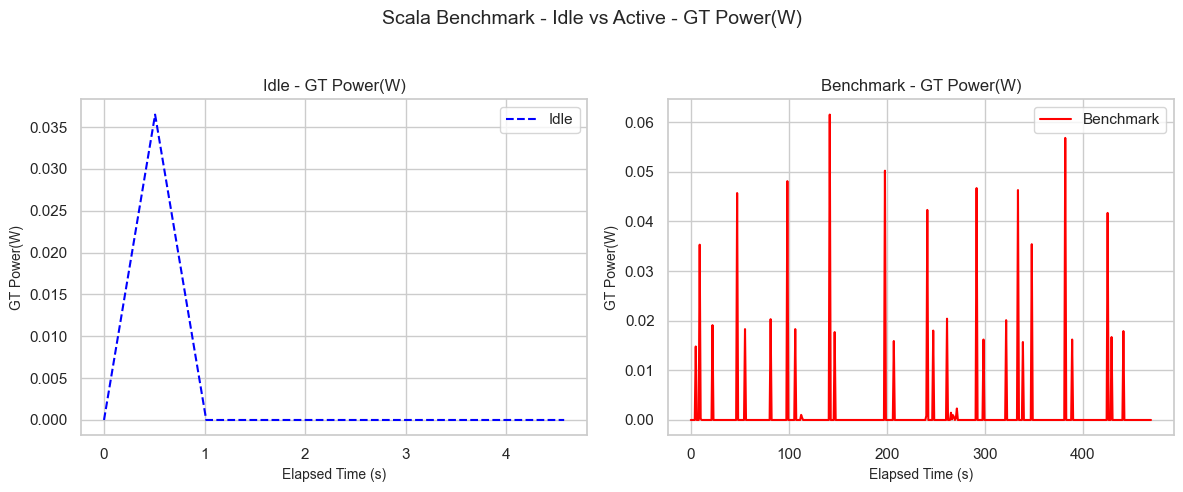

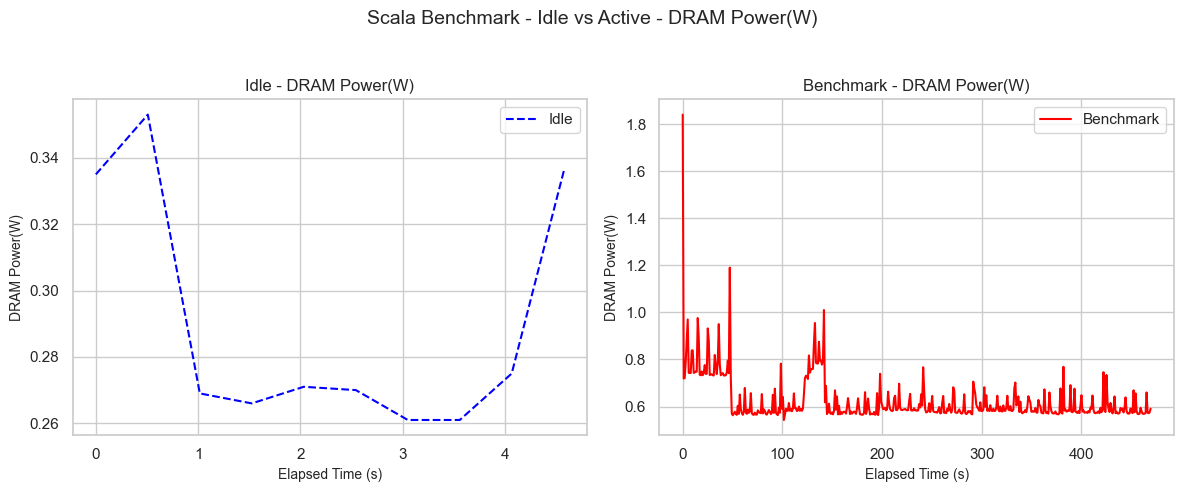

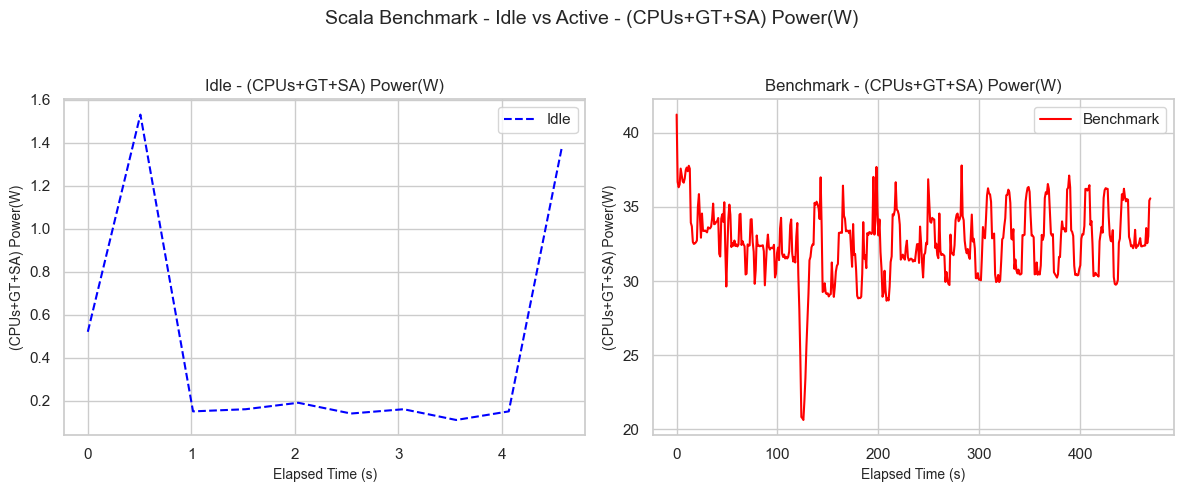

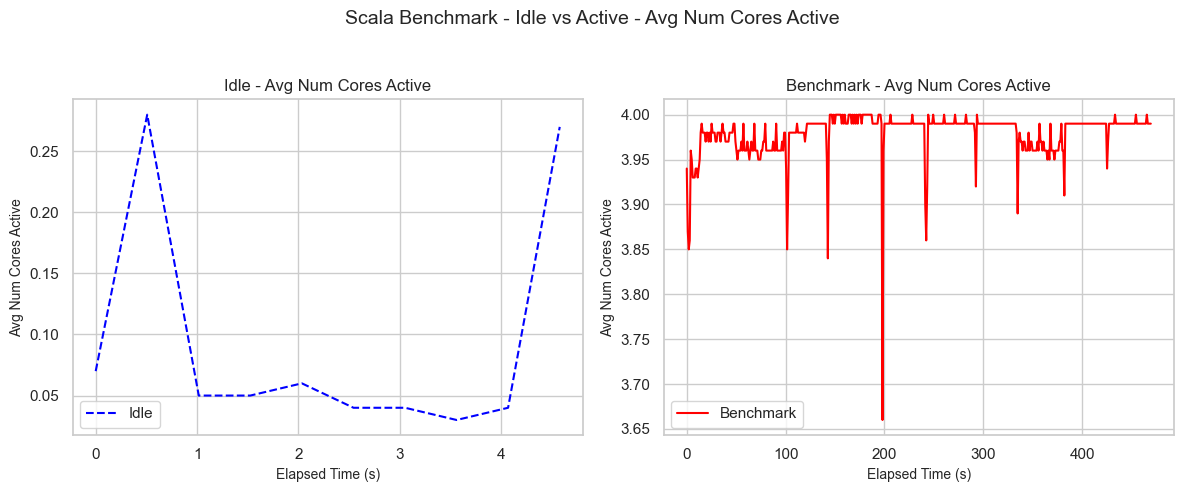

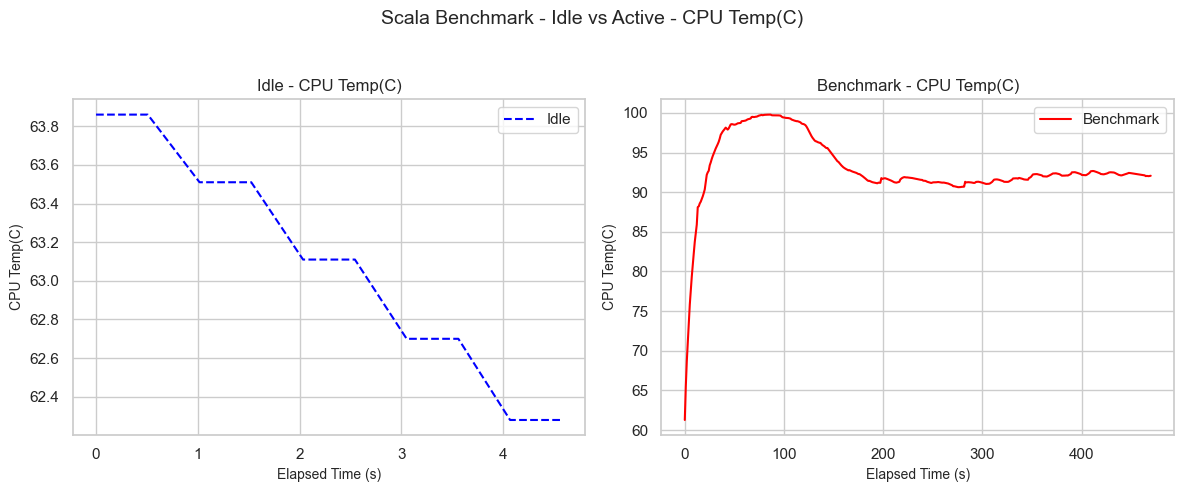

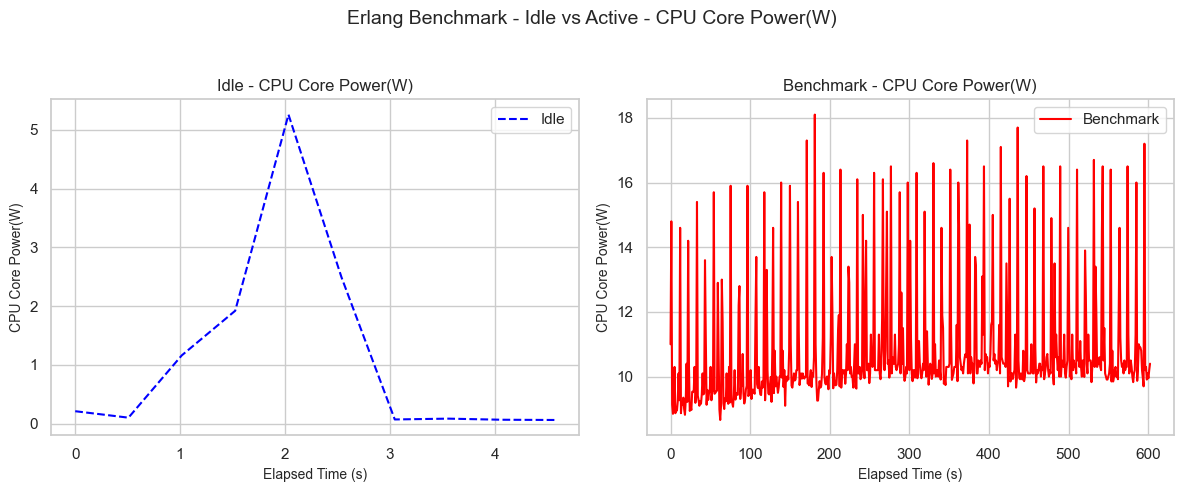

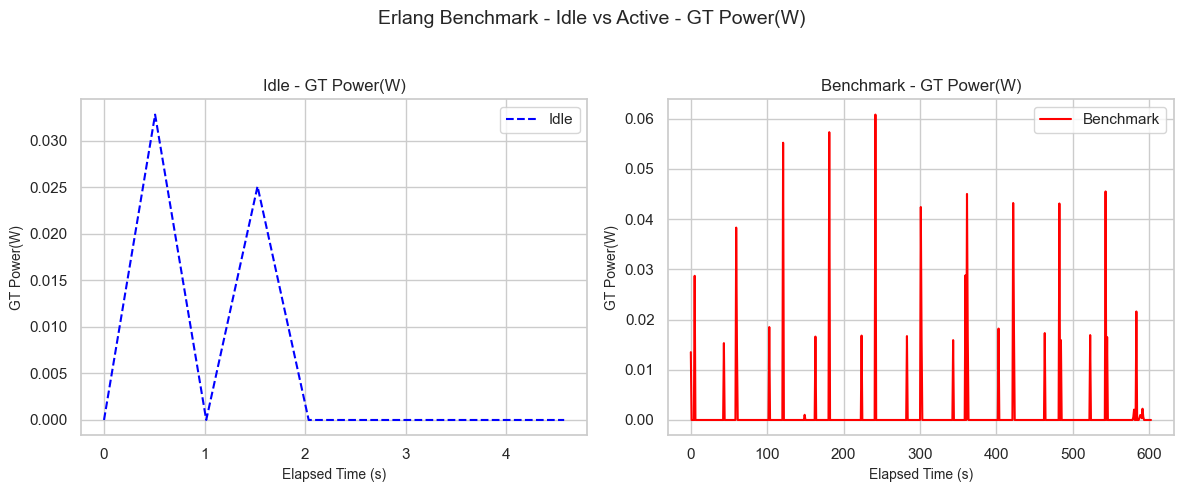

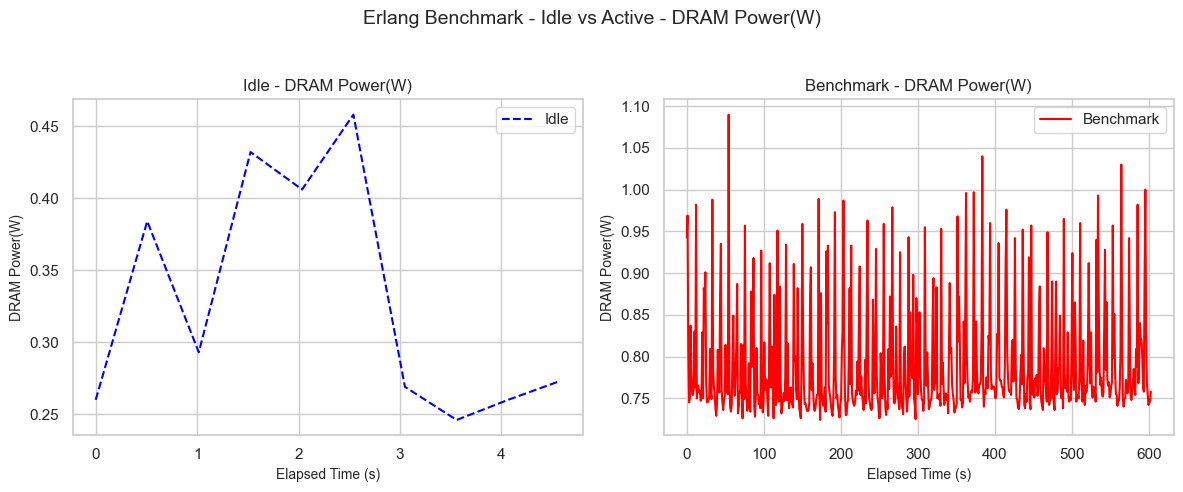

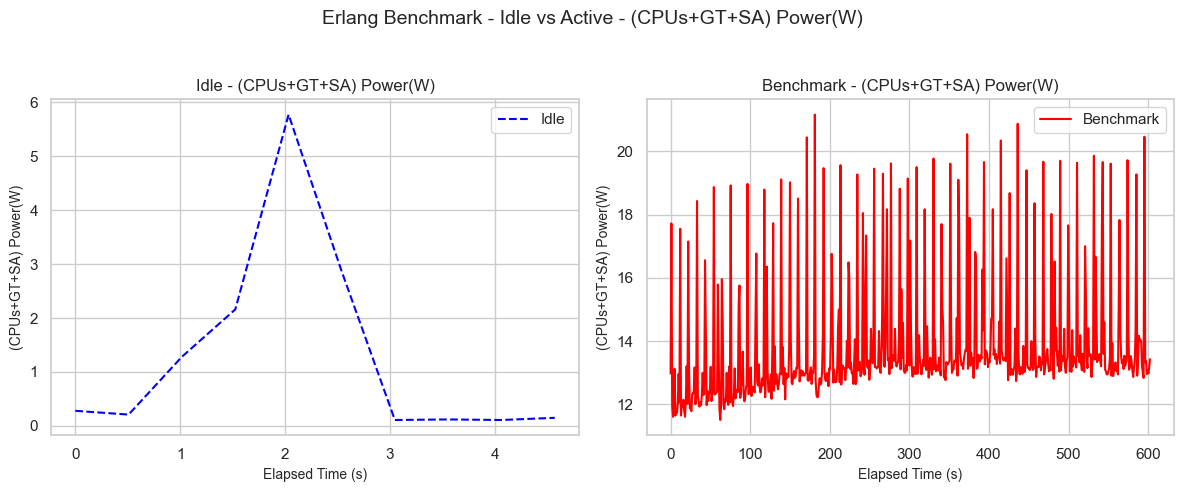

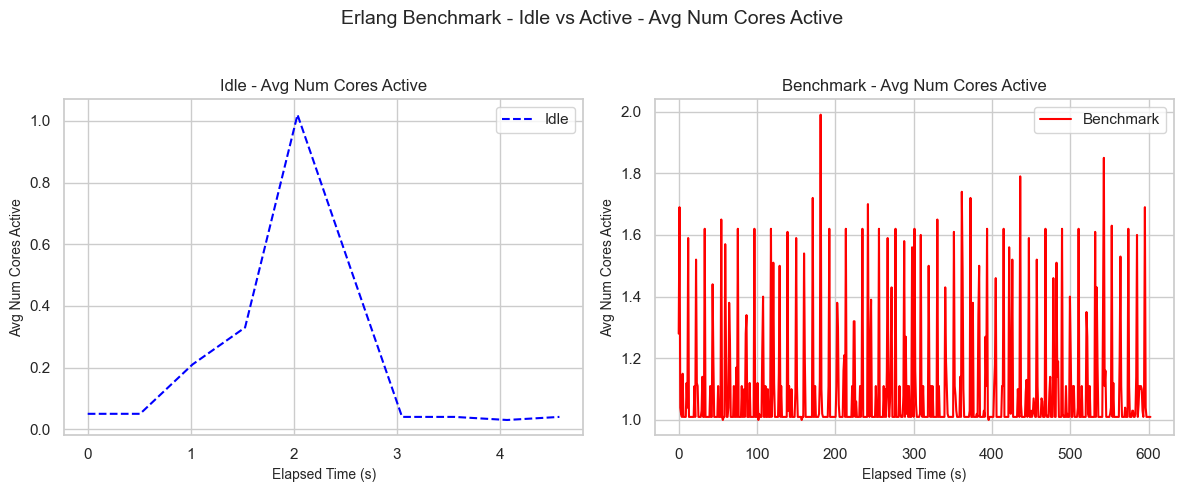

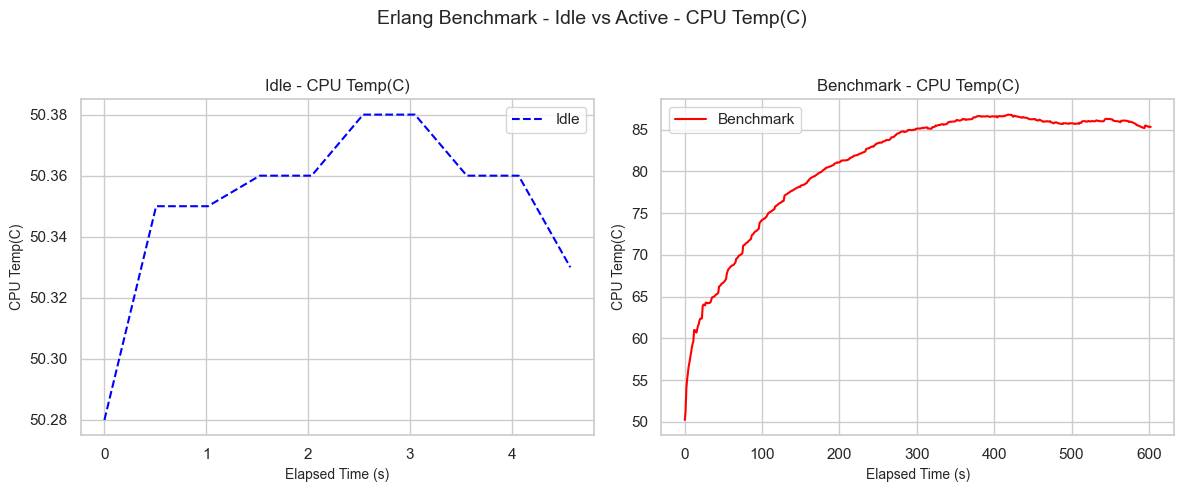

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

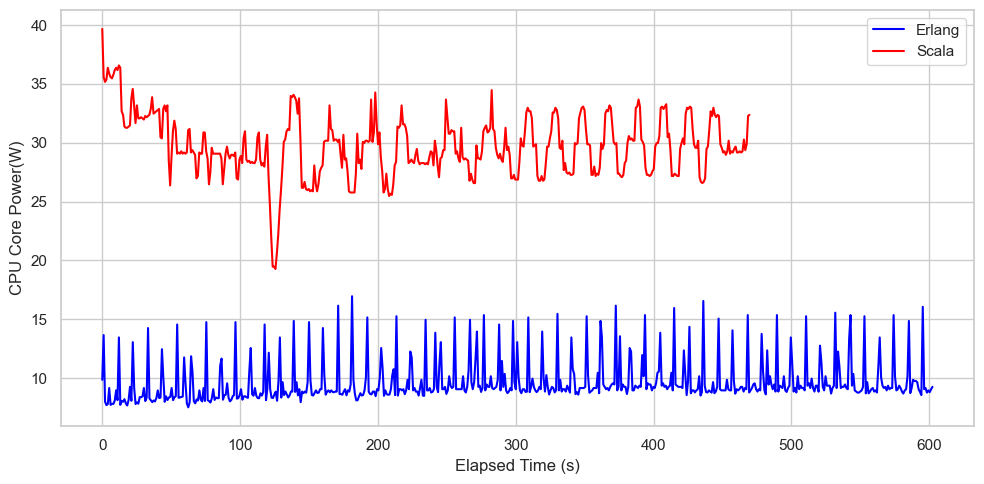

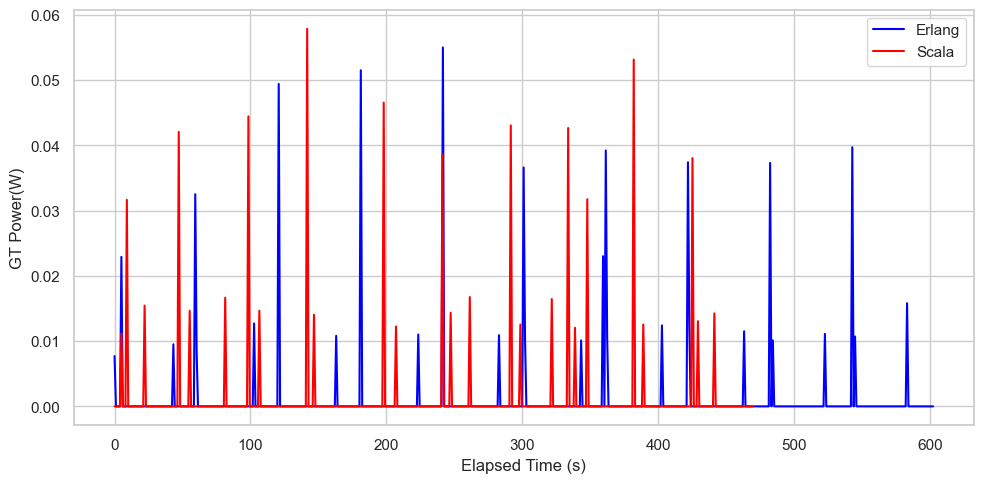

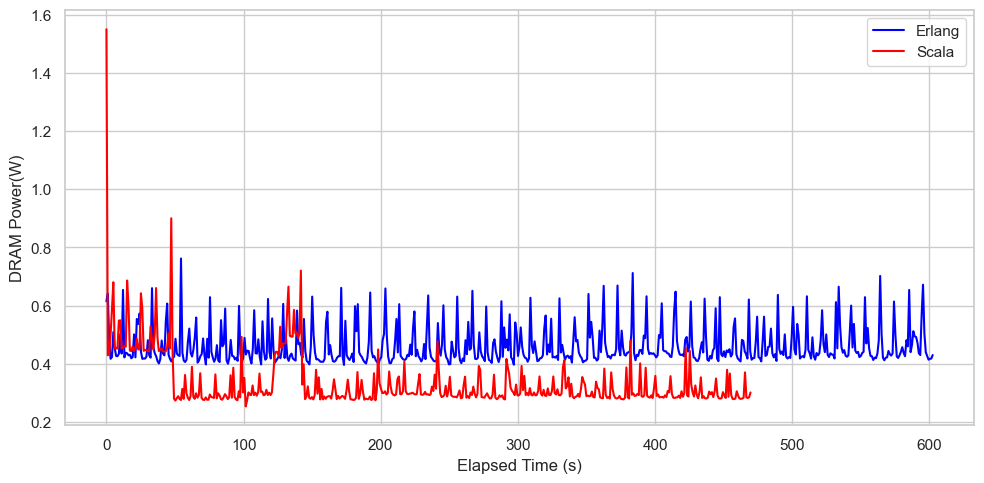

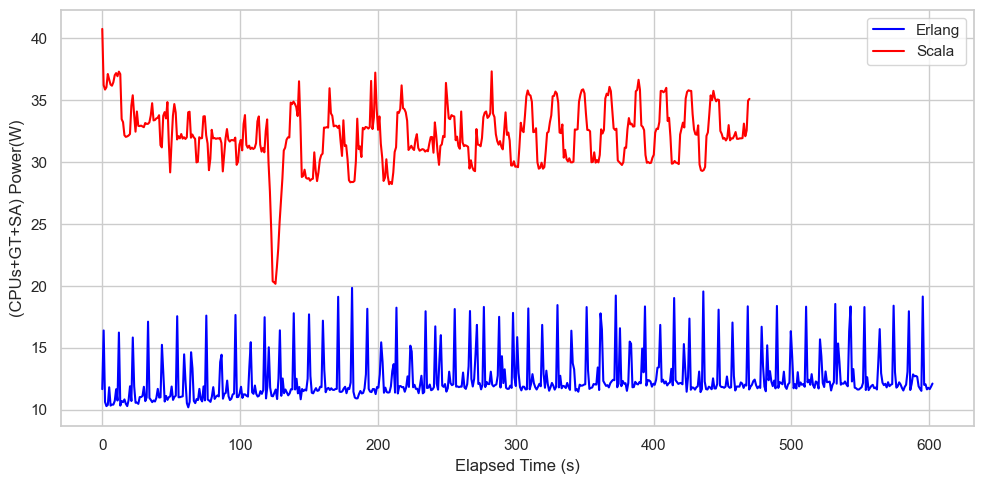

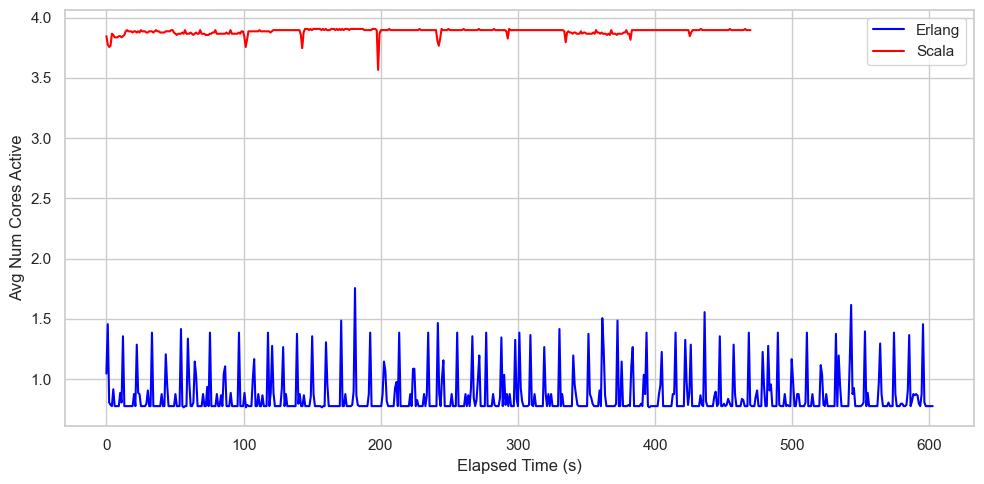

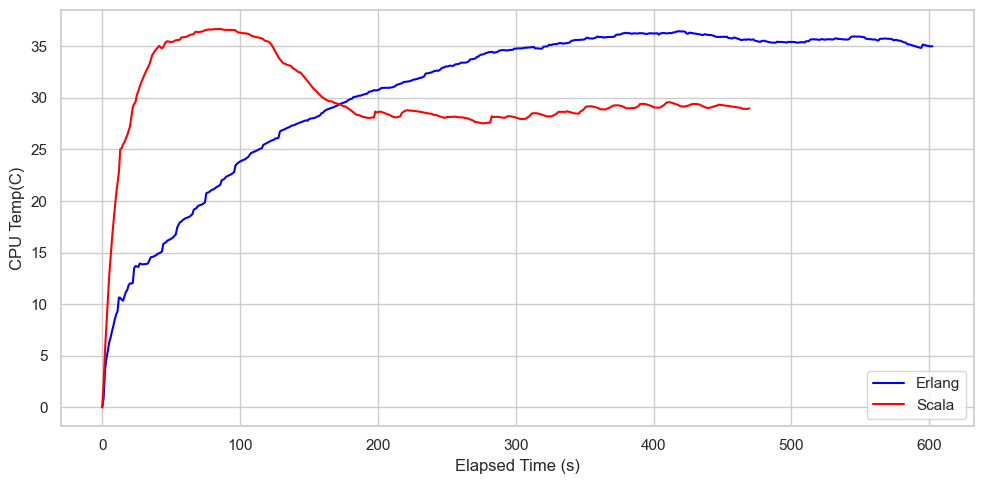

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         0.32686
GT Power(W)               0.00365
DRAM Power(W)             0.28970
(CPUs+GT+SA) Power(W)     0.44800
CPU Temp(C)              63.09200
Avg Num Cores Active      0.09300
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         1.14183
GT Power(W)               0.00579
DRAM Power(W)             0.32810
(CPUs+GT+SA) Power(W)     1.30600
CPU Temp(C)              50.35100
Avg Num Cores Active      0.23400
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        30.028846
GT Power(W)               0.001675
DRAM Power(W)             0.625729
(CPUs+GT+SA) Power(W)    32.643162
CPU Temp(C)              93.043141
Avg Num Cores Active      3.979252
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        10.770584
GT Power(W)               0.001306
DRAM Power(W)             0.788489
(CPUs+GT+SA) Power(W)    13.779983
CPU Temp(C)              80.977696
Avg Num Cores Active      1.098097
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
     "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/4/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 14135.553332678839 Joules
Erlang Benchmark: 6087.734578939248 Joules
